<a href="https://colab.research.google.com/github/MichaelTj02/FinalProject_Group1/blob/main/LicensePlate_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare data and imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

Convert XML label files to .txt

In [ ]:
import os
import xml.etree.ElementTree as ET

def convert_xml_to_yolo(xml_dir, output_dir, class_list, img_dir):

    os.makedirs(output_dir, exist_ok=True)
    for xml_file in os.listdir(xml_dir):
        if xml_file.endswith(".xml"):
            xml_path = os.path.join(xml_dir, xml_file)
            tree = ET.parse(xml_path)
            root = tree.getroot()

            # Get image dimensions
            size = root.find("size")
            img_width = int(size.find("width").text)
            img_height = int(size.find("height").text)

            # Prepare YOLO annotation content
            yolo_annotations = []

            # Parse objects
            for obj in root.findall("object"):
                class_name = obj.find("name").text
                if class_name not in class_list:
                    print(f"Warning: Class '{class_name}' not in class list. Skipping.")
                    continue

                class_id = class_list.index(class_name)
                bndbox = obj.find("bndbox")
                xmin = int(bndbox.find("xmin").text)
                ymin = int(bndbox.find("ymin").text)
                xmax = int(bndbox.find("xmax").text)
                ymax = int(bndbox.find("ymax").text)

                # Convert to YOLO format (normalized values)
                x_center = (xmin + xmax) / 2 / img_width
                y_center = (ymin + ymax) / 2 / img_height
                width = (xmax - xmin) / img_width
                height = (ymax - ymin) / img_height

                yolo_annotations.append(f"{class_id} {x_center} {y_center} {width} {height}")

            # Save annotations to .txt file (one file per image)
            image_name = os.path.splitext(xml_file)[0]
            output_file = os.path.join(output_dir, image_name + ".txt")
            with open(output_file, "w") as f:
                f.write("\n".join(yolo_annotations))
            print(f"Converted: {xml_file} -> {output_file}")

# Define paths
base_dir = r"C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset"
train_xml_dir = os.path.join(base_dir, "labels/train")
val_xml_dir = os.path.join(base_dir, "labels/val")
train_output_dir = os.path.join(base_dir, "train")
val_output_dir = os.path.join(base_dir, "val")
train_img_dir = os.path.join(base_dir, "images/train")
val_img_dir = os.path.join(base_dir, "images/val")

# Class list (e.g., numbers and uppercase letters)
class_list = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789")

# Convert XML to YOLO for train and val datasets
convert_xml_to_yolo(train_xml_dir, train_output_dir, class_list, train_img_dir)
convert_xml_to_yolo(val_xml_dir, val_output_dir, class_list, val_img_dir)


Converted: 0000.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0000.txt
Converted: 0001.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0001.txt
Converted: 0003.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0003.txt
Converted: 0004.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0004.txt
Converted: 0005.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0005.txt
Converted: 0006.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0006.txt
Converted: 0008.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0008.txt
Converted: 0009.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0009.txt
Converted: 0010.xml -> C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\train\0010.txt
Converted:

# License plate character recognition using YOLO

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Setup complete  (32 CPUs, 31.7 GB RAM, 375.5/930.7 GB disk)


In [3]:
from ultralytics import YOLO

In [4]:
model = YOLO('yolov8s.pt') # pretrained model

**Test default model**

In [5]:
%%writefile config.yaml
path: C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset
train: C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images\train
val: C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images\val

# Classes
nc: 36  # Number of classes (26 letters + 10 digits)

# Class names
names:
  0: A
  1: B
  2: C
  3: D
  4: E
  5: F
  6: G
  7: H
  8: I
  9: J
  10: K
  11: L
  12: M
  13: N
  14: O
  15: P
  16: Q
  17: R
  18: S
  19: T
  20: U
  21: V
  22: W
  23: X
  24: Y
  25: Z
  26: 0
  27: 1
  28: 2
  29: 3
  30: 4
  31: 5
  32: 6
  33: 7
  34: 8
  35: 9

Overwriting config.yaml


In [6]:
model.train(data="config.yaml",epochs=5,patience=5,batch=8, lr0=0.0005,imgsz=640, name="default_training_run")

New https://pypi.org/project/ultralytics/8.3.49 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=default_training_run4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sav

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train... 191 images, 0 b


train: New cache created: C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache


val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val... 48 images, 0 backgr

val: New cache created: C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache


Plotting labels to C:\Users\mtj02\runs\detect\default_training_run4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\default_training_run4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.19G       1.37      4.716      1.217        133        640: 100%|██████████| 24/24 [00:01<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         48        455      0.216      0.127     0.0416     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.16G      1.042      3.329      1.044        131        640: 100%|██████████| 24/24 [00:01<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         48        455      0.456      0.214      0.103     0.0755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.11G     0.9887      2.609      1.035        113        640: 100%|██████████| 24/24 [00:01<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         48        455      0.586      0.247      0.239      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.18G     0.9732      2.281      1.024        130        640: 100%|██████████| 24/24 [00:00<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         48        455      0.603      0.343      0.325      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.08G     0.9367      2.107      1.003        123        640: 100%|██████████| 24/24 [00:00<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         48        455      0.701      0.356      0.383      0.301

5 epochs completed in 0.003 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\default_training_run4\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\default_training_run4\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\default_training_run4\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         48        455      0.701      0.356      0.383      0.301
                     A         12         14      0.476      0.571      0.491      0.347
                     B         14         14       0.64      0.429      0.492      0.384
                     C         16         17      0.431      0.471      0.338      0.254
                     D          6          6      0.135      0.167       0.24      0.226
                     E          7          8          0          0      0.253      0.198
                     F          3          3          1          0     0.0427     0.0305
                     H         27         29      0.485      0.862      0.654      0.502
                     J          1          1          1          0          0          0
                     K          7          7      0.575      0.714       0.76      0.623
                     L          6          6      0.339      0.833      0.781      0.666
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002639A911D00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038, 

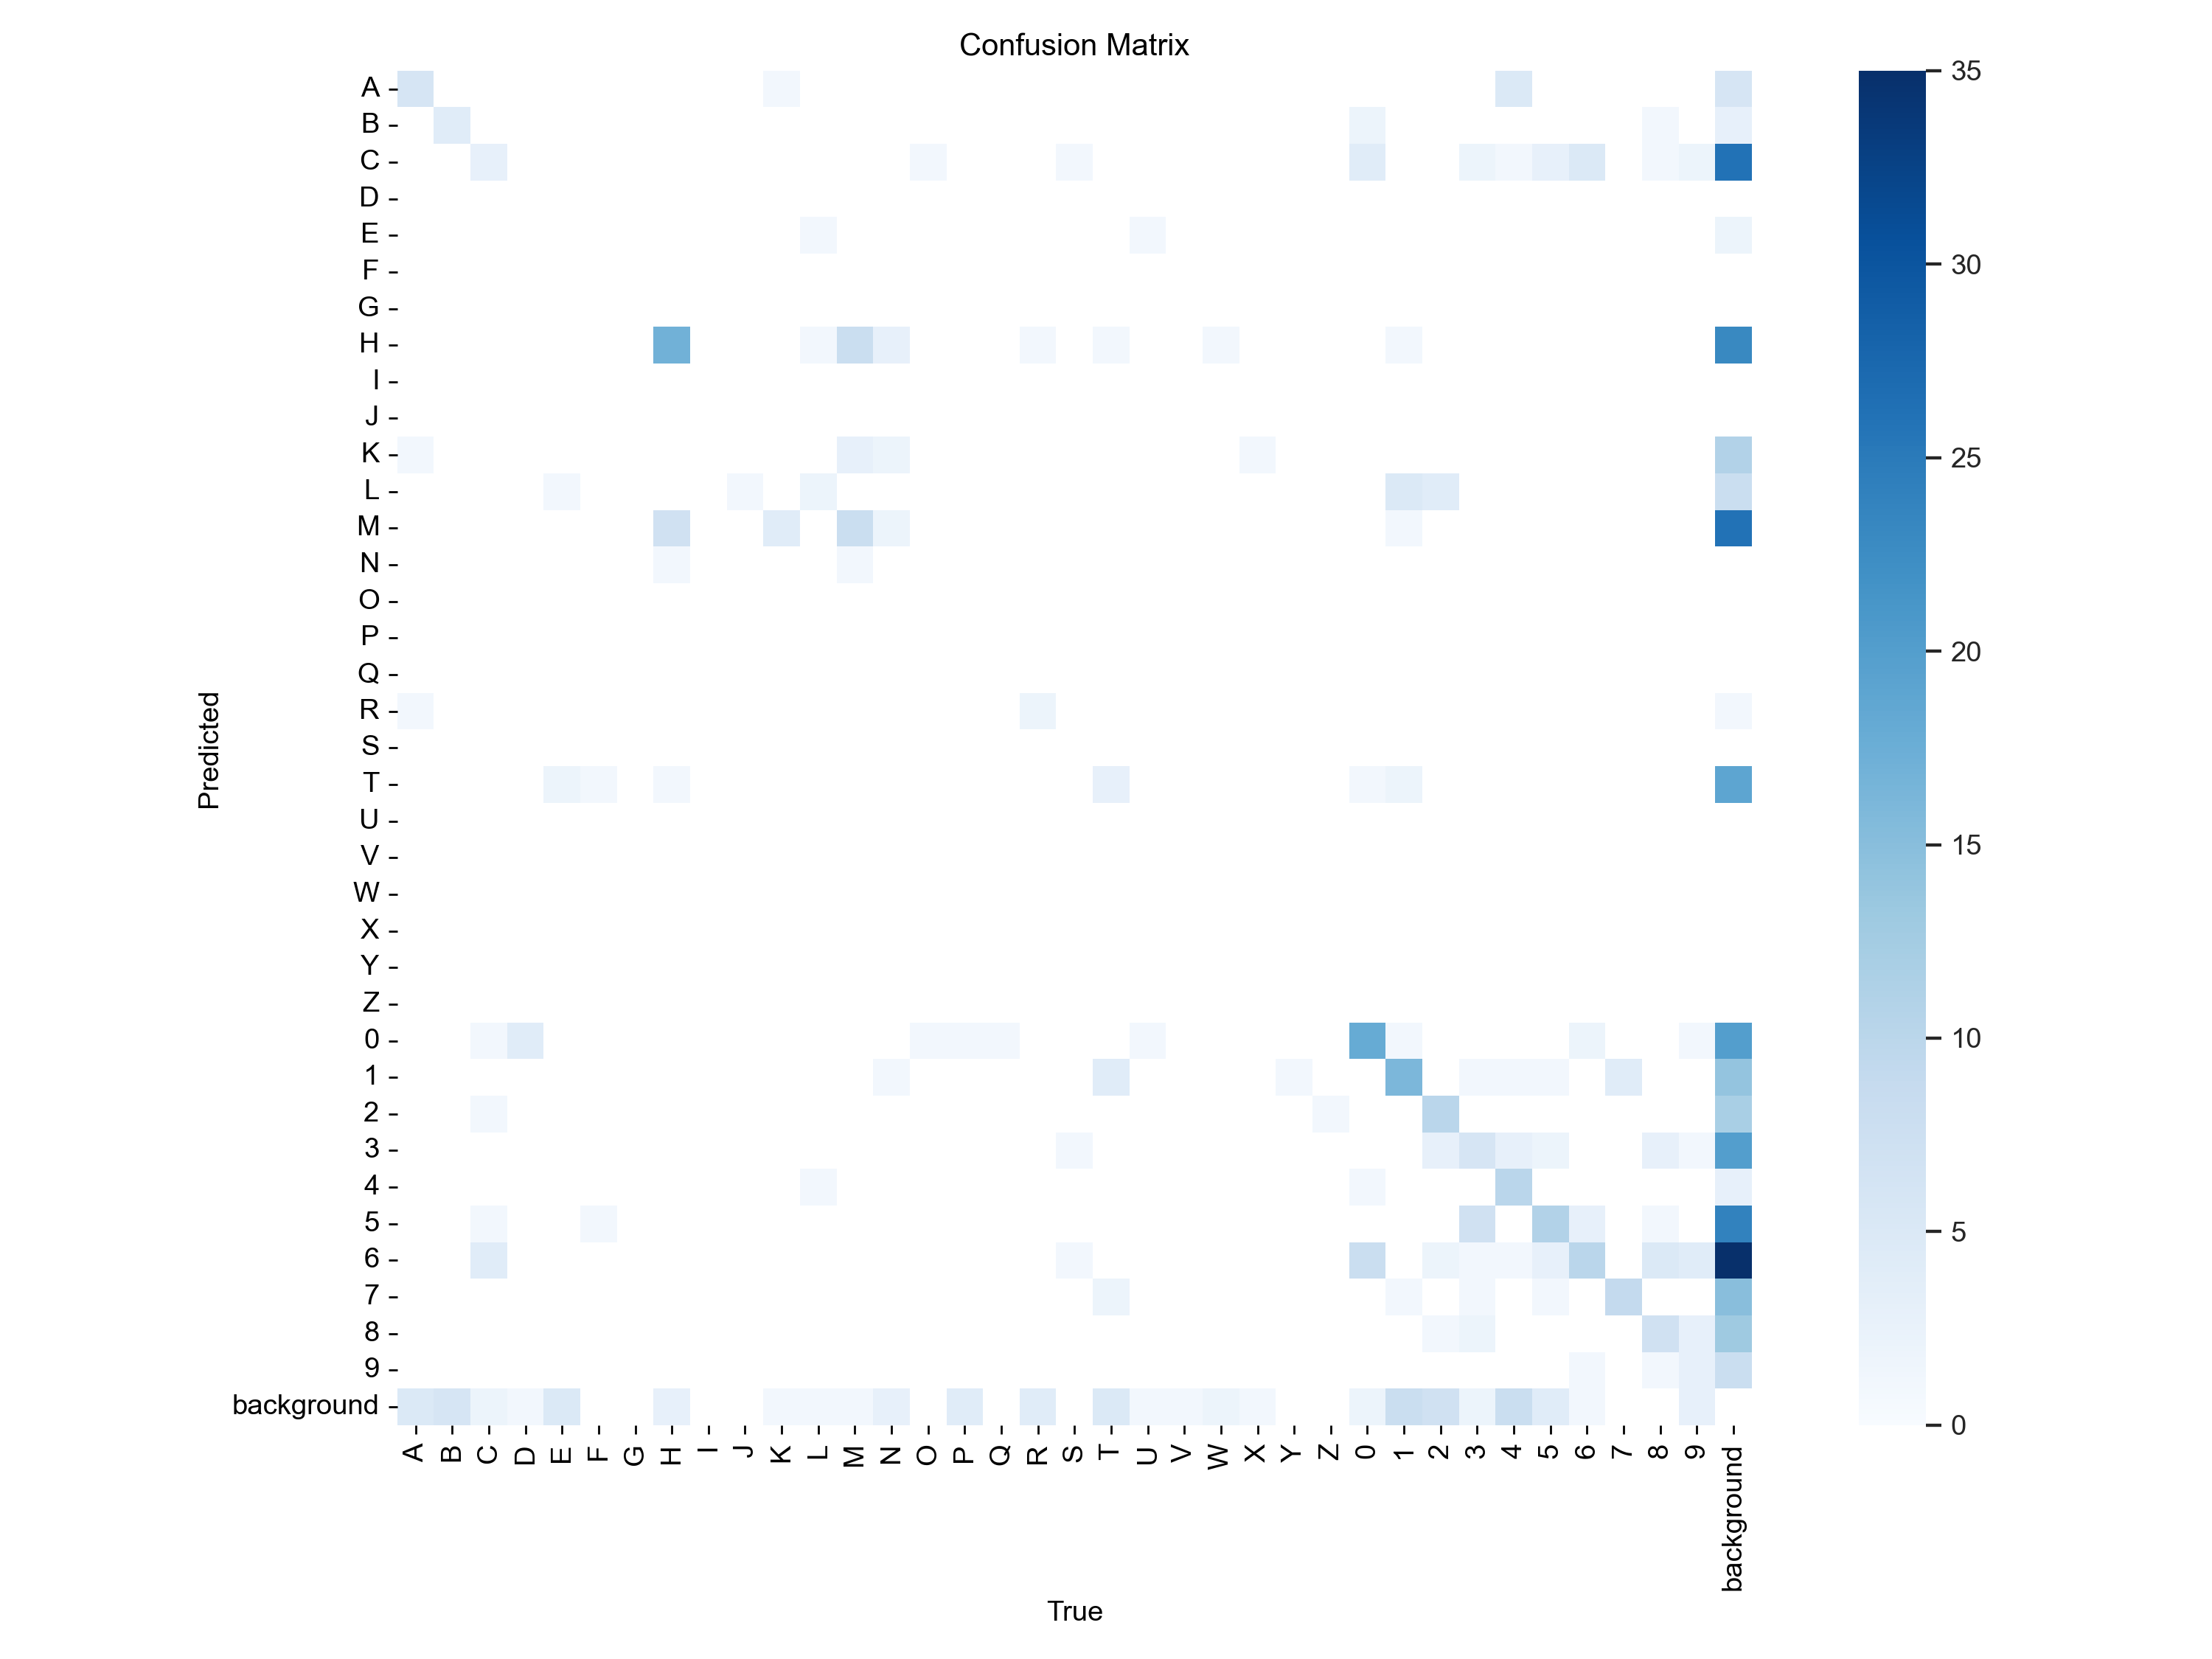

In [ ]:
%matplotlib inline
from PIL import Image

Image.open('C:/Users/mtj02/runs/detect/default_training_run2/confusion_matrix.png')

**Predictions**

In [ ]:
model = YOLO('C:/Users/mtj02/runs/detect/default_training_run2/weights/best.pt')  # load a custom model

In [ ]:
# Perform predictions on the image
results = model.predict(
    source='C:/Users/mtj02/Desktop/FinalProject_Group1/Datasets/LicensePlateDataset/images/train/0000.png',
    save=True,
    show_labels=True
)

# Extract predictions
predicted_text = []
for box in results[0].boxes.data:
    xmin = box[0].item()  # x-coordinate of the top-left corner of the bounding box
    class_id = int(box[-1])  # Class ID of the detected character
    predicted_text.append((xmin, model.names[class_id]))  # Append x-coordinate and character

# Sort the characters by their x-coordinate (left to right)
sorted_text = sorted(predicted_text, key=lambda x: x[0])

# Combine sorted characters into a single string
predicted_string = ''.join([char for _, char in sorted_text])

# Print the sorted predicted text
print("Predicted Text:", predicted_string)



image 1/1 C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images\train\0000.png: 256x640 1 H, 1 M, 1 T, 1 2, 2 5s, 1 6, 1 7, 39.8ms
Speed: 0.0ms preprocess, 39.8ms inference, 3.6ms postprocess per image at shape (1, 3, 256, 640)
Results saved to C:\Users\mtj02\runs\detect\predict3
Predicted Text: MH7T2556


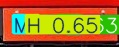

In [ ]:
# Prediction 1
%matplotlib inline
from PIL import Image

Image.open("C:/Users/mtj02/runs/detect/predict2/0000.jpg")

In [ ]:
# Perform predictions on the image
results = model.predict(
    source='C:/Users/mtj02/Desktop/FinalProject_Group1/Datasets/LicensePlateDataset/images/val/0203.png',
    save=True,
    show_labels=True
)

# Extract predictions
predicted_text = []
for box in results[0].boxes.data:
    xmin = box[0].item()  # x-coordinate of the top-left corner of the bounding box
    class_id = int(box[-1])  # Class ID of the detected character
    predicted_text.append((xmin, model.names[class_id]))  # Append x-coordinate and character

# Sort the characters by their x-coordinate (left to right)
sorted_text = sorted(predicted_text, key=lambda x: x[0])

# Combine sorted characters into a single string
predicted_string = ''.join([char for _, char in sorted_text])

# Print the sorted predicted text
print("Predicted Text:", predicted_string)


image 1/1 C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images\val\0203.png: 384x640 2 Hs, 2 Ms, 3 0s, 1 2, 1 3, 1 6, 48.1ms
Speed: 0.0ms preprocess, 48.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to C:\Users\mtj02\runs\detect\predict3
Predicted Text: HMMH320006


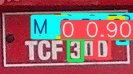

In [ ]:
# Prediction 2
%matplotlib inline
from PIL import Image

Image.open("C:/Users/mtj02/runs/detect/predict3/0203.jpg")

**Finding best parameters for the model**

Try different **learning rates**

In [ ]:
# Learning rates
for lr in [0.01, 0.001, 0.0005, 0.0001]:
    model.train(data="config.yaml", epochs=5, patience=5, batch=8, lr0=lr, imgsz=640, name=f"lr_{lr}")

New https://pypi.org/project/ultralytics/8.3.48 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=detect, mode=train, model=C:/Users/mtj02/runs/detect/default_training_run2/weights/best.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=lr_0.01, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\lr_0.01\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\lr_0.01
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.35G      1.822      4.625      1.553        167        640: 100%|██████████| 21/21 [00:01<00:00, 17.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413     0.0412      0.223     0.0669     0.0439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.19G      1.438      4.402      1.374        181        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413     0.0447      0.288       0.11     0.0809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.22G      1.311      4.191      1.311         87        640: 100%|██████████| 21/21 [00:00<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413     0.0435      0.371      0.122     0.0902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.16G      1.276      4.049      1.292        127        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413     0.0432      0.442      0.148      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.21G      1.274      4.009      1.242        166        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413     0.0432      0.455      0.155      0.116



5 epochs completed in 0.014 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.01\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.01\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\lr_0.01\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413     0.0433      0.455      0.155      0.116
                     A         11         13          0          0          0          0
                     B         10         10     0.0789        0.9      0.178      0.147
                     C         12         12     0.0345      0.333     0.0508      0.037
                     D          5          5     0.0175        0.8     0.0484     0.0283
                     E          7          8          0          0          0          0
                     F          2          2          0          0          0          0
                     H         27         29     0.0986      0.966      0.632      0.458
                     J          1          1          0          0          0          0
                     K          6          6     0.0179          1      0.214      0.155
                     L          6          6       0.05      0.167     0.0359     0.0287
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\lr_0.001\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\lr_0.001
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.56G      1.232      3.932      1.256        167        640: 100%|██████████| 21/21 [00:01<00:00, 20.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413     0.0557      0.479       0.18      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5       2.2G       1.15      3.715      1.183        181        640: 100%|██████████| 21/21 [00:00<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413     0.0474      0.513      0.199      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.15G      1.142      3.528      1.175         87        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413     0.0439      0.564      0.219      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.18G      1.167       3.43      1.188        127        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413       0.71      0.175      0.235       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.15G      1.183      3.409      1.154        166        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.752      0.124      0.247      0.189



5 epochs completed in 0.014 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.001\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.001\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\lr_0.001\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.753      0.125      0.247      0.189
                     A         11         13          1          0      0.555      0.396
                     B         10         10          1          0      0.291      0.231
                     C         12         12          1          0      0.104     0.0776
                     D          5          5          1          0     0.0801     0.0639
                     E          7          8          1          0          0          0
                     F          2          2          1          0     0.0143     0.0115
                     H         27         29      0.543      0.778       0.68      0.521
                     J          1          1          1          0          0          0
                     K          6          6      0.506      0.172       0.41      0.297
                     L          6          6          1          0       0.24      0.181
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\lr_0.0005\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\lr_0.0005
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.56G      1.129      3.325      1.165        167        640: 100%|██████████| 21/21 [00:01<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.799      0.143      0.259      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.33G      1.074      3.115      1.114        181        640: 100%|██████████| 21/21 [00:01<00:00, 18.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.711      0.194      0.284      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.27G      1.078       2.95      1.122         87        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.708      0.228      0.308      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.21G      1.122      2.928      1.145        127        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.694      0.256      0.325      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.28G      1.142      2.919      1.117        166        640: 100%|██████████| 21/21 [00:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.682      0.269      0.332      0.257



5 epochs completed in 0.037 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.0005\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.0005\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\lr_0.0005\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.682      0.269      0.333      0.257
                     A         11         13          1     0.0956      0.602      0.443
                     B         10         10          1      0.185      0.752      0.621
                     C         12         12          0          0      0.108     0.0808
                     D          5          5          1          0     0.0578      0.046
                     E          7          8          1          0     0.0317     0.0242
                     F          2          2          1          0     0.0158     0.0133
                     H         27         29        0.3      0.931       0.75       0.57
                     J          1          1          1          0    0.00822    0.00576
                     K          6          6      0.128      0.833      0.758      0.581
                     L          6          6          1          0      0.299       0.24
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\lr_0.0001\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\lr_0.0001
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.52G      1.065      2.811      1.117        167        640: 100%|██████████| 21/21 [00:01<00:00, 17.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.694       0.27      0.342      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.26G      1.023       2.62      1.076        181        640: 100%|██████████| 21/21 [00:01<00:00, 17.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.637      0.299      0.363      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.28G       1.04      2.506      1.092         87        640: 100%|██████████| 21/21 [00:00<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.675      0.336      0.374       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.21G      1.082      2.512      1.115        127        640: 100%|██████████| 21/21 [00:00<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413        0.7       0.35      0.393      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.26G      1.104      2.535      1.093        166        640: 100%|██████████| 21/21 [00:00<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.701      0.355      0.397      0.306



5 epochs completed in 0.036 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.0001\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\lr_0.0001\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\lr_0.0001\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.704      0.354      0.397      0.306
                     A         11         13      0.743      0.231      0.616      0.432
                     B         10         10          1      0.449      0.807       0.65
                     C         12         12      0.142      0.235      0.134      0.104
                     D          5          5          1          0      0.134      0.119
                     E          7          8          1          0     0.0825     0.0659
                     F          2          2          1          0      0.018     0.0162
                     H         27         29      0.361      0.931      0.798      0.622
                     J          1          1          1          0     0.0107    0.00749
                     K          6          6      0.168      0.833      0.843      0.634
                     L          6          6      0.586      0.333       0.39      0.319
                     

We found that **lr = 0.0001** performs best. Now try different **batch sizes**.

In [ ]:
# Try different batch sizes
for batch_size in [4, 8, 16, 32]:
    model.train(data="config.yaml", epochs=5, patience=5, batch=batch_size, lr0=0.0001, imgsz=640, name=f"batch_{batch_size}")

New https://pypi.org/project/ultralytics/8.3.48 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=detect, mode=train, model=C:/Users/mtj02/runs/detect/default_training_run2/weights/best.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=batch_4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\batch_4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\batch_4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.35G       1.09       2.56      1.111         72        640: 100%|██████████| 42/42 [00:01<00:00, 24.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<0

                   all         42        413      0.763      0.329      0.399      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.27G      1.094      2.385      1.117         48        640: 100%|██████████| 42/42 [00:01<00:00, 30.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<0

                   all         42        413      0.702      0.366      0.414      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.26G      1.075      2.352       1.09         75        640: 100%|██████████| 42/42 [00:01<00:00, 30.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<0


                   all         42        413      0.705      0.396      0.433      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.27G      1.075        2.3      1.112         63        640: 100%|██████████| 42/42 [00:01<00:00, 31.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<0


                   all         42        413      0.745      0.373      0.452      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.28G      1.064      2.272      1.095         38        640: 100%|██████████| 42/42 [00:01<00:00, 31.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<0


                   all         42        413      0.759      0.374      0.457      0.353

5 epochs completed in 0.037 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_4\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_4\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\batch_4\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<0


                   all         42        413      0.759      0.374      0.456      0.353
                     A         11         13      0.685       0.67       0.66      0.465
                     B         10         10          1      0.335      0.738      0.591
                     C         12         12      0.228      0.223      0.212      0.164
                     D          5          5          1          0      0.186       0.15
                     E          7          8          1          0      0.214      0.172
                     F          2          2          1          0     0.0249     0.0224
                     H         27         29      0.454      0.918      0.826      0.649
                     J          1          1          1          0     0.0079    0.00553
                     K          6          6      0.332      0.833      0.843      0.651
                     L          6          6       0.93        0.5      0.701       0.57
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\batch_8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\batch_8
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.56G     0.9841      2.135      1.072        167        640: 100%|██████████| 21/21 [00:01<00:00, 17.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.759      0.385      0.468      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.35G     0.9566      1.997       1.04        181        640: 100%|██████████| 21/21 [00:01<00:00, 13.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.782      0.361      0.478       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.29G     0.9671      1.944      1.053         87        640: 100%|██████████| 21/21 [00:01<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.753      0.404      0.492      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.21G      1.013      2.014       1.08        127        640: 100%|██████████| 21/21 [00:00<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.747      0.417      0.501      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.29G      1.037      2.045      1.063        166        640: 100%|██████████| 21/21 [00:00<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.752      0.429      0.504      0.388

5 epochs completed in 0.036 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_8\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_8\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\batch_8\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413       0.75      0.428      0.504      0.388
                     A         11         13      0.589      0.846      0.722       0.49
                     B         10         10      0.967        0.6      0.799      0.649
                     C         12         12      0.227       0.25      0.262      0.203
                     D          5          5          1          0      0.391      0.353
                     E          7          8          1          0      0.323      0.265
                     F          2          2          1          0     0.0553     0.0497
                     H         27         29      0.478      0.966      0.877       0.69
                     J          1          1          1          0     0.0191     0.0153
                     K          6          6      0.258      0.833       0.85      0.647
                     L          6          6      0.797      0.655      0.755      0.613
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\batch_16\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\batch_16
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      4.33G     0.9677      1.929      1.053        125        640: 100%|██████████| 11/11 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         42        413      0.746      0.438      0.495      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         4G     0.9908      1.948      1.048        107        640: 100%|██████████| 11/11 [00:00<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         42        413      0.774      0.431      0.506      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.99G     0.9432      1.903      1.029        129        640: 100%|██████████| 11/11 [00:00<00:00, 13.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         42        413      0.773      0.446      0.515      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.98G     0.9735      1.867      1.068        128        640: 100%|██████████| 11/11 [00:00<00:00, 13.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         42        413      0.782      0.451      0.521      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.98G     0.9946      1.906      1.061        136        640: 100%|██████████| 11/11 [00:00<00:00, 13.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         42        413      0.788      0.433      0.527       0.41



5 epochs completed in 0.036 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_16\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_16\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\batch_16\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0


                   all         42        413      0.788      0.434      0.526       0.41
                     A         11         13      0.588      0.846      0.769      0.543
                     B         10         10          1      0.457      0.846      0.688
                     C         12         12       0.34      0.345      0.332      0.256
                     D          5          5          1          0      0.329      0.288
                     E          7          8      0.883       0.25      0.388      0.309
                     F          2          2          1          0     0.0905     0.0814
                     H         27         29      0.535      0.952      0.909      0.715
                     J          1          1          1          0     0.0163      0.013
                     K          6          6      0.533      0.833      0.855      0.634
                     L          6          6      0.845      0.667       0.84      0.686
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\batch_32\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\batch_32
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5       7.7G     0.9433      1.741      1.026        133        640: 100%|██████████| 6/6 [00:02<00:00,  2.72
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         42        413      0.789      0.433      0.524      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      7.51G     0.9668      1.801      1.047        134        640: 100%|██████████| 6/6 [00:01<00:00,  5.57
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         42        413      0.795      0.431      0.529      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      7.73G     0.9501      1.815      1.034        185        640: 100%|██████████| 6/6 [00:00<00:00,  7.45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         42        413      0.794      0.434      0.535      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      7.42G     0.9697      1.799      1.055        152        640: 100%|██████████| 6/6 [00:00<00:00,  7.56
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         42        413      0.803      0.424      0.538      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      7.49G     0.9691      1.793      1.047        132        640: 100%|██████████| 6/6 [00:00<00:00,  7.69
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         42        413      0.802      0.428      0.538      0.418

5 epochs completed in 0.037 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_32\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\batch_32\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\batch_32\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         42        413      0.798       0.43      0.539      0.419
                     A         11         13        0.6      0.846      0.792      0.544
                     B         10         10          1      0.505      0.829      0.681
                     C         12         12      0.264     0.0833      0.394      0.324
                     D          5          5          1          0       0.39      0.343
                     E          7          8      0.808       0.25      0.423      0.332
                     F          2          2          1          0     0.0711      0.064
                     H         27         29      0.587      0.931      0.915      0.712
                     J          1          1          1          0     0.0262     0.0209
                     K          6          6       0.56      0.833      0.861      0.639
                     L          6          6      0.793      0.833      0.834      0.682
                     

We found that **batch size = 32** performs best. Now try different **epochs**.

In [ ]:
for epoch in [10, 30, 50, 100]:
  model.train(data="config.yaml",epochs=epoch,patience=5,batch=32, lr0=0.0001,imgsz=640, name=f"epoch_{epoch}")

New https://pypi.org/project/ultralytics/8.3.48 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=detect, mode=train, model=C:/Users/mtj02/runs/detect/default_training_run2/weights/best.pt, data=config.yaml, epochs=10, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=epoch_10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retin

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\epoch_10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\epoch_10
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.36G     0.9358      1.788      1.027         65        640: 100%|██████████| 21/21 [00:01<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.741      0.459      0.537      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.25G     0.9467      1.726      1.017         68        640: 100%|██████████| 21/21 [00:01<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.784      0.474      0.552      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.28G     0.9265      1.615      1.021         67        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413       0.76      0.515      0.556      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.21G     0.9129      1.552      1.005         62        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.771      0.532      0.573       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.28G     0.9287      1.551      1.007         65        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.787      0.537      0.586      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.22G     0.9034      1.475      1.008         67        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.835      0.504      0.588      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.22G     0.9198      1.438          1         67        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.847       0.51      0.593      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.28G     0.9096      1.462      0.996         61        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.887      0.518      0.615      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.22G     0.8846      1.421     0.9936         69        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.874      0.523      0.619      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.21G     0.8912      1.397     0.9809         65        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.873      0.521       0.62      0.484



10 epochs completed in 0.046 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\epoch_10\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\epoch_10\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\epoch_10\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.874      0.521       0.62      0.484
                     A         11         13      0.585      0.923      0.914      0.643
                     B         10         10          1      0.842      0.928      0.719
                     C         12         12      0.679      0.884      0.831      0.658
                     D          5          5      0.899        0.4      0.518      0.445
                     E          7          8      0.624        0.5      0.622      0.489
                     F          2          2          1          0      0.142      0.128
                     H         27         29      0.828      0.931      0.958      0.717
                     J          1          1          1          0     0.0995     0.0796
                     K          6          6      0.545      0.833      0.894      0.692
                     L          6          6      0.864      0.833      0.904      0.743
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\epoch_30\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\epoch_30
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.56G     0.9441      1.822      1.048        167        640: 100%|██████████| 21/21 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.819      0.501      0.628      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.35G     0.8966      1.567      1.014        181        640: 100%|██████████| 21/21 [00:01<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.829      0.474      0.617      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.29G     0.9162      1.506      1.022         87        640: 100%|██████████| 21/21 [00:01<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.809      0.494      0.635      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.23G     0.9441      1.558      1.041        127        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.806       0.49      0.653      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.28G     0.9865      1.597       1.03        166        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.799      0.494      0.636      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.27G     0.9508      1.525      1.028        121        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.789      0.511      0.644      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.24G     0.9232       1.48      1.018        103        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.822      0.518      0.656      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.33G     0.9332      1.418      1.022        131        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.824      0.518       0.67      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.24G     0.9125      1.391      1.017        166        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.868      0.523      0.672      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.33G     0.9163      1.304      1.014        150        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.883      0.533      0.679      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.25G     0.9021      1.267      1.008        141        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.885      0.551      0.696      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.23G     0.9021      1.264          1        134        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.877       0.56      0.726      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.24G     0.8964      1.255     0.9947        157        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.907      0.559      0.754      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.24G     0.9006       1.22      1.011        155        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.917      0.566      0.776      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.24G     0.8646      1.203     0.9828        151        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.886      0.568      0.789      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.29G     0.8639      1.151     0.9922        129        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.788      0.652      0.797      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.23G     0.8639      1.196     0.9887        118        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413       0.79      0.667      0.802      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.24G     0.8814      1.164     0.9922        172        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.818      0.673      0.813      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.24G     0.8927      1.183      0.995        131        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.797      0.678      0.815       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.23G      0.868      1.109     0.9927        156        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.752      0.716      0.816      0.652


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.33G     0.8634      1.208     0.9924         62        640: 100%|██████████| 21/21 [00:01<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.756      0.721      0.819      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.24G     0.8573      1.091     0.9799         58        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.829      0.656      0.785      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.25G     0.8827       1.13     0.9674         66        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.677      0.706      0.774      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       2.3G     0.8621      1.116      0.969         65        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.693      0.684      0.775      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.27G     0.8486      1.102     0.9562         66        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.686      0.713      0.785      0.619
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 20, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



25 epochs completed in 0.055 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\epoch_30\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\epoch_30\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\epoch_30\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.751      0.716      0.819      0.655
                     A         11         13      0.594      0.923      0.942      0.635
                     B         10         10      0.547          1      0.977      0.778
                     C         12         12       0.74      0.917      0.975       0.81
                     D          5          5      0.249        0.8      0.618      0.552
                     E          7          8      0.735      0.698      0.812      0.643
                     F          2          2          1      0.958      0.995      0.846
                     H         27         29      0.868          1      0.992      0.769
                     J          1          1       0.59          1      0.995      0.796
                     K          6          6       0.52          1      0.948      0.793
                     L          6          6      0.851      0.955      0.972      0.818
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\epoch_50\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\epoch_50
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.56G     0.8434      1.092     0.9831        167        640: 100%|██████████| 21/21 [00:01<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.824      0.681      0.831      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.35G     0.8144      1.012     0.9601        181        640: 100%|██████████| 21/21 [00:01<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.833      0.677      0.828      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.21G     0.8198     0.9872     0.9686         87        640: 100%|██████████| 21/21 [00:01<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413        0.9      0.623      0.835      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.29G     0.8446      1.053      0.988        127        640: 100%|██████████| 21/21 [00:01<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.743      0.753      0.836      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.28G     0.8896      1.104     0.9804        166        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.738      0.754      0.846      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.27G     0.8622       1.04     0.9821        121        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.758      0.757      0.855      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.24G     0.8316      1.019     0.9702        103        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.865      0.695      0.868      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.33G       0.84     0.9868     0.9737        131        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.878      0.689      0.861      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.31G     0.8377     0.9881     0.9776        166        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.797      0.772      0.873      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.32G     0.8368     0.9346     0.9702        150        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.772      0.776      0.863      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.22G     0.8247     0.9247     0.9676        141        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.788      0.761      0.859      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.23G     0.8289     0.9336     0.9624        134        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.799      0.773      0.867      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.23G     0.8341     0.9264     0.9613        157        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.804      0.767      0.869       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.24G     0.8301     0.9064     0.9734        155        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.812      0.766      0.879      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.24G     0.8053     0.8992      0.951        151        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.858      0.788      0.884      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.21G     0.8037     0.8685     0.9597        129        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.848      0.781      0.882      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.23G     0.8074     0.9144     0.9581        118        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.821      0.818      0.881      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.24G      0.823     0.8833     0.9603        172        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.825      0.791      0.886      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.22G     0.8392     0.9015     0.9654        131        640: 100%|██████████| 21/21 [00:01<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.911      0.749      0.884      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.23G     0.8209     0.8544     0.9627        156        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.893      0.763      0.885      0.707
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 15, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



20 epochs completed in 0.048 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\epoch_50\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\epoch_50\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\epoch_50\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.857      0.789      0.884      0.711
                     A         11         13        0.9      0.923      0.946      0.659
                     B         10         10       0.93          1      0.995       0.79
                     C         12         12      0.845      0.917      0.961      0.803
                     D          5          5      0.365        0.6      0.713      0.682
                     E          7          8      0.656       0.75      0.795      0.623
                     F          2          2      0.609          1      0.995      0.895
                     H         27         29       0.89          1      0.991       0.76
                     J          1          1      0.703          1      0.995      0.796
                     K          6          6      0.764          1      0.924      0.751
                     L          6          6      0.848      0.938      0.972      0.855
                     

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 167 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 42 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\epoch_100\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\epoch_100
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.55G      0.783     0.8687     0.9557        167        640: 100%|██████████| 21/21 [00:01<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.868      0.779      0.885      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.26G     0.7494     0.7937      0.932        181        640: 100%|██████████| 21/21 [00:01<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413       0.85      0.783      0.874      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.21G     0.7499      0.771     0.9376         87        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.882      0.775      0.878      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.23G     0.7722     0.8356     0.9556        127        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.899       0.75      0.886      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.3G     0.8349     0.9069     0.9545        166        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.874      0.764      0.901      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.26G     0.8032      0.839     0.9548        121        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.882      0.764       0.88      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.24G     0.7751     0.8238      0.944        103        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413       0.86      0.817      0.903      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.25G     0.7782     0.8001     0.9473        131        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.859       0.81      0.903      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.23G     0.7817     0.8139     0.9509        166        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.867      0.817      0.901       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.24G     0.7837     0.7792     0.9445        150        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.864      0.829      0.903       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.22G     0.7726     0.7777      0.944        141        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.911       0.81      0.901      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.23G     0.7829      0.791     0.9403        134        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.923      0.801      0.905       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.23G     0.7889     0.7858     0.9409        157        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.908       0.79      0.904      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.22G     0.7942     0.7899     0.9537        155        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.928       0.79      0.901      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.22G     0.7793     0.7902     0.9357        151        640: 100%|██████████| 21/21 [00:01<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.932      0.789      0.898      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.21G     0.7809     0.7704     0.9455        129        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.914        0.8      0.895      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.23G     0.7871     0.8146     0.9444        118        640: 100%|██████████| 21/21 [00:01<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         42        413      0.827       0.82        0.9      0.716
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 12, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



17 epochs completed in 0.045 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\epoch_100\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\epoch_100\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\epoch_100\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         42        413      0.922      0.801      0.905      0.721
                     A         11         13      0.934      0.923       0.94      0.654
                     B         10         10      0.943          1      0.995       0.82
                     C         12         12      0.999      0.917      0.975      0.811
                     D          5          5          1      0.794      0.895      0.781
                     E          7          8      0.856      0.742      0.827       0.65
                     F          2          2      0.908          1      0.995      0.821
                     H         27         29      0.884          1      0.988      0.753
                     J          1          1      0.909          1      0.995      0.796
                     K          6          6      0.786          1      0.901      0.714
                     L          6          6      0.899          1      0.995      0.847
                     

We found that **epoch = 50** is best.

**Test tuned model with the hyperparameters**

In [7]:
# best hyperparameters
model.train(data="config.yaml",epochs=50, patience=5, batch=32, lr0=0.0001, imgsz=640, name="tuned_model")

New https://pypi.org/project/ultralytics/8.3.49 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=50, time=None, patience=5, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=tuned_model3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

train: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\train.cache... 191 image
val: Scanning C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\labels\val.cache... 48 images, 0 


Plotting labels to C:\Users\mtj02\runs\detect\tuned_model3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00025, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to C:\Users\mtj02\runs\detect\tuned_model3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.61G     0.9303      2.015     0.9984        659        640: 100%|██████████| 6/6 [00:01<00:00,  3.35
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455       0.71      0.362      0.396      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.46G     0.9202      1.946      1.002        562        640: 100%|██████████| 6/6 [00:01<00:00,  5.04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.722      0.406      0.426      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       7.3G      0.923      1.791      0.995        584        640: 100%|██████████| 6/6 [00:01<00:00,  5.86
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.809        0.4      0.485       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.39G     0.9106      1.686     0.9903        584        640: 100%|██████████| 6/6 [00:01<00:00,  5.79
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455       0.81       0.43      0.543      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.29G     0.8824        1.5     0.9717        681        640: 100%|██████████| 6/6 [00:01<00:00,  5.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.674      0.548       0.58      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.43G     0.8753      1.332     0.9667        449        640: 100%|██████████| 6/6 [00:01<00:00,  5.79
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         48        455      0.766      0.545      0.649      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.47G     0.8651      1.219     0.9685        506        640: 100%|██████████| 6/6 [00:01<00:00,  5.72
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.763       0.67      0.721      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.49G     0.8554      1.147     0.9561        612        640: 100%|██████████| 6/6 [00:01<00:00,  5.82
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         48        455      0.817       0.68      0.749       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       7.6G     0.8876      1.073     0.9633        559        640: 100%|██████████| 6/6 [00:01<00:00,  5.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.765      0.734      0.778      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       7.3G     0.8405     0.9635     0.9594        559        640: 100%|██████████| 6/6 [00:01<00:00,  5.94
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         48        455        0.8      0.754      0.806      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.42G     0.8327     0.9303     0.9365        683        640: 100%|██████████| 6/6 [00:01<00:00,  5.86
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         48        455      0.848      0.758      0.824      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.44G     0.8281     0.9072     0.9528        484        640: 100%|██████████| 6/6 [00:01<00:00,  5.93
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         48        455      0.876      0.728      0.829      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.38G     0.8219     0.8558     0.9293        614        640: 100%|██████████| 6/6 [00:01<00:00,  5.96
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         48        455      0.876      0.777      0.837      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       7.3G     0.8284     0.8627     0.9452        610        640: 100%|██████████| 6/6 [00:01<00:00,  5.87
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         48        455      0.891      0.781      0.864      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.44G     0.8079     0.7962     0.9387        634        640: 100%|██████████| 6/6 [00:01<00:00,  5.88
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.849      0.808      0.869      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.43G     0.7841     0.7675     0.9349        515        640: 100%|██████████| 6/6 [00:00<00:00,  6.24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.825      0.802      0.863      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.45G     0.8045     0.7752     0.9375        670        640: 100%|██████████| 6/6 [00:01<00:00,  5.89
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.835      0.833      0.873      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.29G     0.7896     0.7434     0.9354        577        640: 100%|██████████| 6/6 [00:01<00:00,  5.99
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.903      0.815      0.891      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.39G     0.7911     0.7332     0.9236        519        640: 100%|██████████| 6/6 [00:01<00:00,  5.95
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.818      0.855      0.914      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.33G     0.7848     0.7269      0.931        670        640: 100%|██████████| 6/6 [00:01<00:00,  5.95
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         48        455      0.803      0.825      0.905      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.43G     0.7707     0.6761      0.919        558        640: 100%|██████████| 6/6 [00:01<00:00,  5.92
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.776      0.871      0.905       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.32G     0.7941     0.6694     0.9321        483        640: 100%|██████████| 6/6 [00:01<00:00,  5.95
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.749      0.877      0.905      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.39G     0.7603     0.6537     0.9186        617        640: 100%|██████████| 6/6 [00:01<00:00,  5.93
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.829       0.89      0.933      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.37G     0.7648     0.6217     0.9293        536        640: 100%|██████████| 6/6 [00:00<00:00,  7.01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.898      0.863      0.936      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.31G     0.7714     0.6271     0.9121        601        640: 100%|██████████| 6/6 [00:00<00:00,  6.91
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.925      0.835      0.933       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.44G     0.7367     0.6228     0.9134        586        640: 100%|██████████| 6/6 [00:00<00:00,  7.11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.911      0.846      0.936      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.32G     0.7294     0.6009     0.9023        548        640: 100%|██████████| 6/6 [00:00<00:00,  7.15
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.933      0.851      0.928      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.43G     0.7315     0.5929     0.9158        453        640: 100%|██████████| 6/6 [00:00<00:00,  7.14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.933      0.854      0.928      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.31G     0.7375     0.5958     0.9104        518        640: 100%|██████████| 6/6 [00:00<00:00,  7.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         48        455      0.931      0.853      0.945      0.747
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 24, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



29 epochs completed in 0.025 hours.
Optimizer stripped from C:\Users\mtj02\runs\detect\tuned_model3\weights\last.pt, 22.5MB
Optimizer stripped from C:\Users\mtj02\runs\detect\tuned_model3\weights\best.pt, 22.5MB

Validating C:\Users\mtj02\runs\detect\tuned_model3\weights\best.pt...
Ultralytics 8.3.47  Python-3.12.6 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         48        455      0.898      0.863      0.935      0.748
                     A         12         14      0.757      0.929       0.93       0.67
                     B         14         14      0.956      0.857      0.889      0.682
                     C         16         17          1      0.852      0.992      0.823
                     D          6          6      0.768      0.833      0.826       0.74
                     E          7          8      0.802       0.75      0.741       0.65
                     F          3          3      0.716      0.667      0.913      0.764
                     H         27         29      0.959          1      0.995      0.751
                     J          1          1      0.838          1      0.995      0.697
                     K          7          7      0.823          1      0.871      0.694
                     L          6          6      0.979          1      0.995      0.874
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000263BDF3D5B0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038, 

**Test the model**

In [9]:
model = YOLO("C:/Users/mtj02/Desktop/FinalProject_Group1/Best_LicensePlate/weights/best.pt")  # load a custom model

In [10]:
# Perform predictions on the image
results = model.predict(
    source='C:/Users/mtj02/Desktop/FinalProject_Group1/Datasets/LicensePlateDataset/images/train/0000.png',
    save=True,
    show_labels=True
)

# Extract predictions
predicted_text = []
for box in results[0].boxes.data:
    xmin = box[0].item()  # x-coordinate of the top-left corner of the bounding box
    class_id = int(box[-1])  # Class ID of the detected character
    predicted_text.append((xmin, model.names[class_id]))  # Append x-coordinate and character

# Sort the characters by their x-coordinate (left to right)
sorted_text = sorted(predicted_text, key=lambda x: x[0])

# Combine sorted characters into a single string
predicted_string = ''.join([char for _, char in sorted_text])

# Print the sorted predicted text
print("Predicted Text:", predicted_string)


image 1/1 C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images\train\0000.png: 256x640 1 C, 1 H, 1 M, 1 T, 1 1, 1 4, 3 5s, 51.4ms
Speed: 1.0ms preprocess, 51.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)
Results saved to C:\Users\mtj02\runs\detect\predict6
Predicted Text: MH15TC554


In [25]:
# Perform predictions on the image
results = model.predict(
    source='C:/Users/mtj02/Desktop/FinalProject_Group1/Datasets/LicensePlateDataset/images/val/0217.png',
    save=True,
    conf=0.15,
    show_labels=True
)

# Extract predictions
predicted_text = []
for box in results[0].boxes.data:
    xmin = box[0].item()  # x-coordinate of the top-left corner of the bounding box
    class_id = int(box[-1])  # Class ID of the detected character
    predicted_text.append((xmin, model.names[class_id]))  # Append x-coordinate and character

# Sort the characters by their x-coordinate (left to right)
sorted_text = sorted(predicted_text, key=lambda x: x[0])

# Combine sorted characters into a single string
predicted_string = ''.join([char for _, char in sorted_text])

# Print the sorted predicted text
print("Predicted Text:", predicted_string)


image 1/1 C:\Users\mtj02\Desktop\FinalProject_Group1\Datasets\LicensePlateDataset\images\val\0217.png: 224x640 1 B, 1 N, 1 T, 1 W, 1 1, 2 3s, 1 8, 1 9, 16.6ms
Speed: 2.5ms preprocess, 16.6ms inference, 4.0ms postprocess per image at shape (1, 3, 224, 640)
Results saved to C:\Users\mtj02\runs\detect\predict6
Predicted Text: TN38BW139


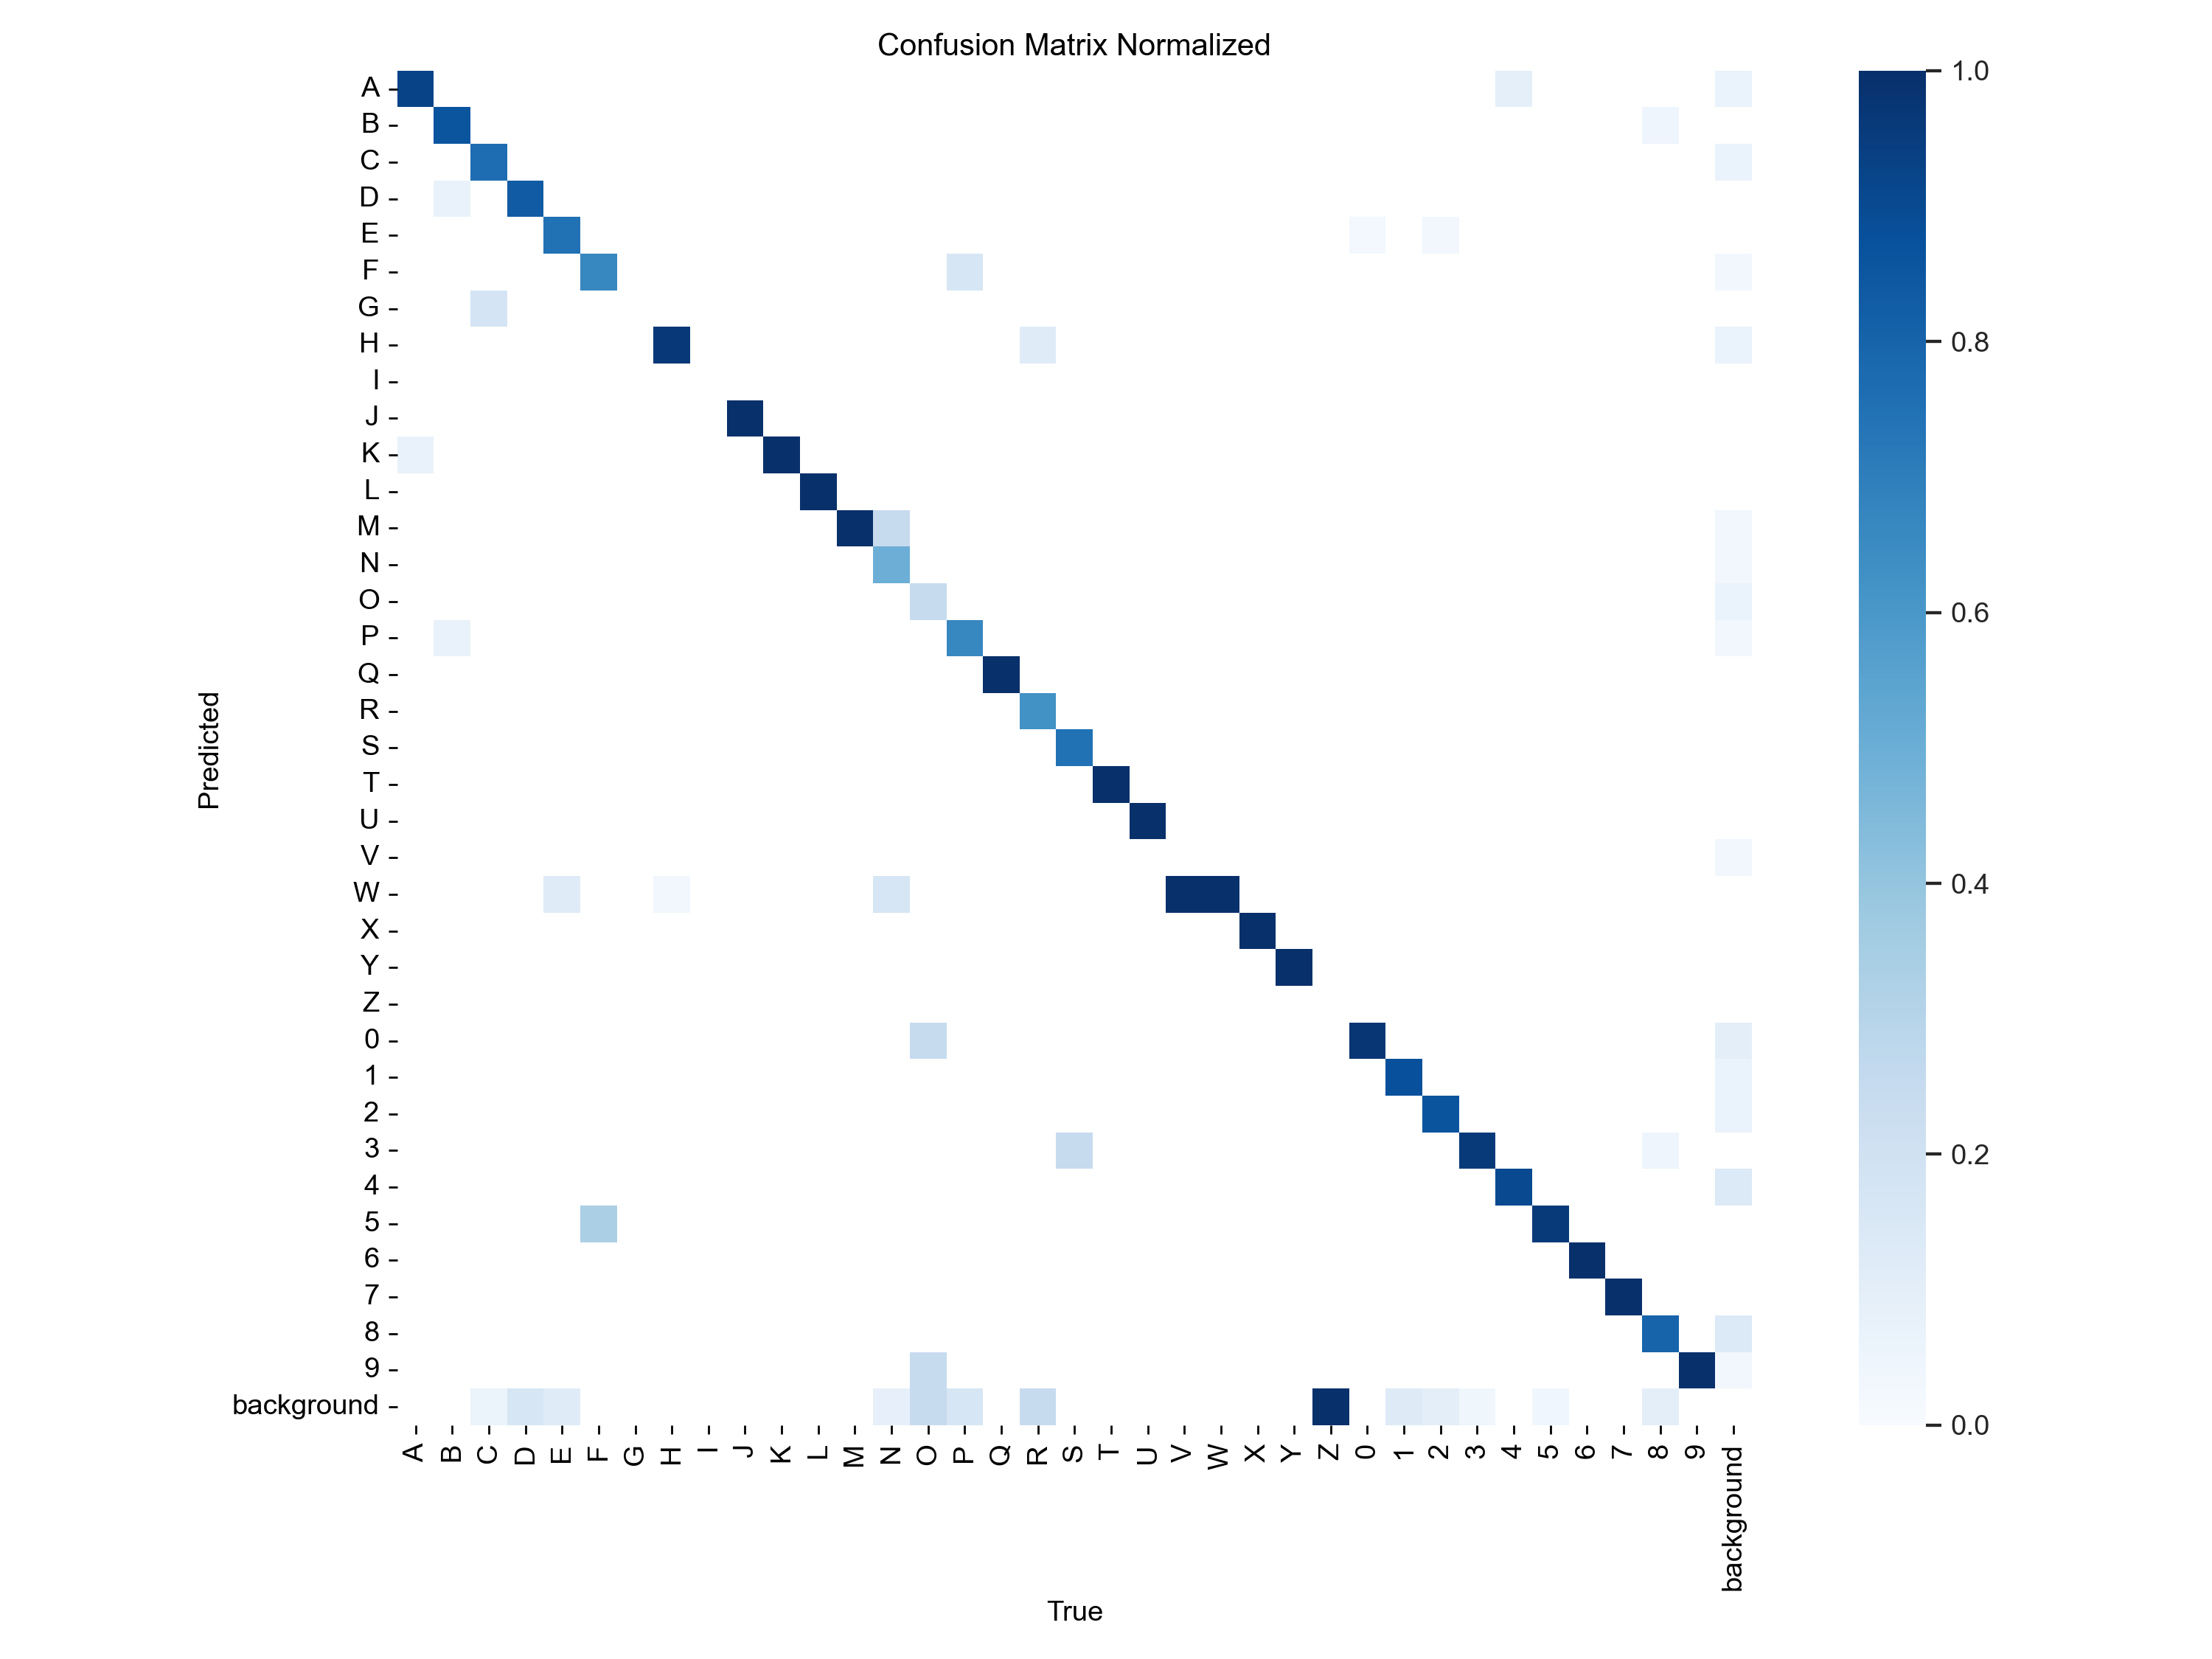

In [13]:
%matplotlib inline
from PIL import Image

Image.open("C:/Users/mtj02/Desktop/FinalProject_Group1/Best_LicensePlate/confusion_matrix_normalized.png")